# Colorama - Campanha Mickey e amigos


O projeto é um estudo de caso da nova campanha de coleção de esmaltes, Mickey e amigos, da empresa Colorama. 

O objetivo deste case é determinar e analisar os resultados produzidos pelos onze influenciadores contratos pela empresa. 

A campanha envolveu publicações apenas no Instagram; o escopo da ação foi composto por conteúdos no feed, reels e stories.


<img src="https://www.coloramaesmaltes.com.br/-/media/Project/Loreal/Brand-Sites/Essie/MASTER/DMI/Banners-Home/2022/Junho/Imagem-Banner-Interna-Disney-e-Amigos-Colorama.jpg" width="500">

## Análise 

Primeiramente será feita a análise dos dados que foram gerados pelos onze influenciadores contratados para fazer a campanha da empresa Colorama. 

O intuíto dessa análise é gerar um comparativo do desempenho dos influenciadores e assim poder predizer o resultado da campanha.  

In [1]:
# Bibliotecas que serão utilizadas neste trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados
df = pd.read_excel('/content/BRMedia_Base_Colorama.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
# Analisando as cinco primeiras linhas 
df.head()

,Segmento_Mercado,Data,Marca,Campanha,Nome,User,Base/ Seguidores,Porte,Link do Post,Plataforma,...,Negativos,Marca.2,Preço,Produto/ Serviços,Neutros,Tempo de Reprodução,Tempo médio de Visualização,Expansão de Detalhes,Engajamento Twitter,Engajamento
0,Cosmeticos,2022-06-07,Colorama,Colorama Mickey e amigos,Gabs Floquet,heygabsf,69258,Micro,NaN,Instagram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138
1,Cosmeticos,2022-06-07,Colorama,Colorama Mickey e amigos,Gabs Floquet,heygabsf,69258,Micro,NaN,Instagram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227
2,Cosmeticos,2022-06-07,Colorama,Colorama Mickey e amigos,Gabs Floquet,heygabsf,69258,Micro,NaN,Instagram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199
3,Cosmeticos,2022-06-07,Colorama,Colorama Mickey e amigos,Gabs Floquet,heygabsf,69258,Micro,NaN,Instagram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163
4,Cosmeticos,2022-06-07,Colorama,Colorama Mickey e amigos,Gabs Floquet,heygabsf,69258,Micro,NaN,Instagram,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83


In [4]:
# Checando o tipo de cada coluna 
df.dtypes

Segmento_Mercado                       object
Data                           datetime64[ns]
Marca                                  object
Campanha                               object
Nome                                   object
User                                   object
Base/ Seguidores                        int64
Porte                                  object
Link do Post                           object
Plataforma                             object
Formato                                object
Combo                                   int64
Screen                                float64
Alcance                               float64
Impressões                            float64
Views                                 float64
Respostas                             float64
Shares                                float64
Cliques no Link                       float64
Cliques no @                          float64
Cliques na #                          float64
Toques para avançar               

In [5]:
# Analisando quais são as colunas do nosso dataset
df.columns

Index(['Segmento_Mercado', 'Data', 'Marca', 'Campanha', 'Nome', 'User',
       'Base/ Seguidores', 'Porte', 'Link do Post', 'Plataforma', 'Formato',
       'Combo', 'Screen', 'Alcance', 'Impressões', 'Views', 'Respostas',
       'Shares', 'Cliques no Link', 'Cliques no @', 'Cliques na #',
       'Toques para avançar', 'Voltar', 'Saídas', 'Próximos Story', 'Likes',
       'Salvos', 'Comentários', 'Positivos', 'Marca.1', 'Produtos/ Serviços',
       'Interações com Conteúdo', 'Negativos', 'Marca.2', 'Preço',
       'Produto/ Serviços', 'Neutros', 'Tempo de Reprodução',
       'Tempo médio de Visualização', 'Expansão de Detalhes',
       'Engajamento Twitter', 'Engajamento'],
      dtype='object')

Analisar as colunas do dataset é importante pois com 42 colunas de dados sobre a campanha, é interessante analisar qual informação será importante e agregará na análise. 
Por ser uma campanha que envolveu apenas publicações no instagram será analisado o "Engajamento" porém não será analisado o "Engajamento no Twitter" por ter menor relevância para este case. Também será analisado "Alcance" e "Base por seguidores", e o motivo de tal escolha será descrito e calculado. 


In [6]:
# Analisando valores nulos
df.isnull().sum()

Segmento_Mercado                0
Data                            0
Marca                           0
Campanha                        0
Nome                            0
User                            0
Base/ Seguidores                0
Porte                           0
Link do Post                   74
Plataforma                      0
Formato                         0
Combo                           0
Screen                         18
Alcance                         0
Impressões                     17
Views                          75
Respostas                      20
Shares                          5
Cliques no Link                79
Cliques no @                   49
Cliques na #                   86
Toques para avançar            19
Voltar                         18
Saídas                         19
Próximos Story                 19
Likes                          74
Salvos                         74
Comentários                    74
Positivos                      74
Marca.1       

Foi realizada a análise de valores nulos dos dados para saber se os dados que serão trabalhados nesse projeto estavam tratados. 

Como iremos analisar "Engajamento", "Alcance" e "Base por seguidores", e estes não possuem dados nulos, podemos dar prosseguimento a análise da campanha.  

### Análise do Engajamento

Uma das métricas mais importantes a se analisar é o Engajamento. 
O Engajamento mede o nível de interação dos seguidores com o conteúdo gerado. 

Sendo assim, podemos analisar qual dos influencers teve uma interação maior com seus seguidores na campanha Mickey e Amigos. 

In [7]:
# Agrupando os dados por Influencer
influencers = df.groupby('Nome')

In [8]:
# Estatísticas resumidas
influencers.describe()

Base/ Seguidores                                               \
                           count      mean  std       min       25%       50%   
Nome                                                                            
Amanda                      13.0  569293.0  0.0  569293.0  569293.0  569293.0   
Andreza Delgado              5.0   29156.0  0.0   29156.0   29156.0   29156.0   
Gabs Floquet                 9.0   69258.0  0.0   69258.0   69258.0   69258.0   
Lenise                       7.0  909816.0  0.0  909816.0  909816.0  909816.0   
Luisa Malizia                9.0  294335.0  0.0  294335.0  294335.0  294335.0   
Mirella Qualha              11.0  175857.0  0.0  175857.0  175857.0  175857.0   
Tatiane Lima                 7.0  101595.0  0.0  101595.0  101595.0  101595.0   
Thay Bergamim                8.0  216406.0  0.0  216406.0  216406.0  216406.0   
Victória Collen              9.0  979438.0  0.0  979438.0  979438.0  979438.0   
Vitória Bueno               10.0  416700.0  0.0  416700.0  416700.0  416700.0   
Will                         4.0  139966.0  0.0  139966.0  139966.0  139966.0   

                                    Combo            ... Engajamento Twitter  \
                      75%       max count      mean  ...                 75%   
Nome                                                 ...                       
Amanda           569293.0  569293.0  13.0  1.384615  ...                 NaN   
Andreza Delgado   29156.0   29156.0   5.0  1.000000  ...                 NaN   
Gabs Floquet      69258.0   69258.0   9.0  1.000000  ...                 NaN   
Lenise           909816.0  909816.0   7.0  1.000000  ...                 NaN   
Luisa Malizia    294335.0  294335.0   9.0  1.555556  ...                 NaN   
Mirella Qualha   175857.0  175857.0  11.0  1.545455  ...                 NaN   
Tatiane Lima     101595.0  101595.0   7.0  1.000000  ...                 NaN   
Thay Bergamim    216406.0  216406.0   8.0  1.500000  ...                 NaN   
Victória Collen  979438.0  979438.0   9.0  1.444444  ...                 NaN   
Vitória Bueno    416700.0  416700.0  10.0  1.500000  ...                 NaN   
Will             139966.0  139966.0   4.0  1.000000  ...                 NaN   

                    Engajamento                                            \
                max       count         mean           std    min     25%   
Nome                                                                        
Amanda          NaN        13.0  2059.692308   1779.685337  280.0  483.00   
Andreza Delgado NaN         5.0    61.800000     99.185180   13.0   15.00   
Gabs Floquet    NaN         9.0   185.111111    158.798177   73.0   87.00   
Lenise          NaN         7.0  2259.857143   4402.797120  304.0  391.50   
Luisa Malizia   NaN         9.0  6064.111111  12365.379447  249.0  371.00   
Mirella Qualha  NaN        11.0   219.090909    436.602211   11.0   17.00   
Tatiane Lima    NaN         7.0  2899.000000   5702.553288  152.0  178.50   
Thay Bergamim   NaN         8.0   305.000000    531.810654   36.0   47.50   
Victória Collen NaN         9.0  2575.000000   2989.405961  386.0  908.00   
Vitória Bueno   NaN        10.0   550.700000    710.232990  104.0  188.75   
Will            NaN         4.0   664.000000   1036.348397  120.0  131.25   

                                           
                    50%      75%      max  
Nome                                       
Amanda           1288.0  3585.00   5454.0  
Andreza Delgado    16.0    26.00    239.0  
Gabs Floquet      138.0   199.00    584.0  
Lenise            420.0  1064.00  12184.0  
Luisa Malizia     815.0  1434.00  37444.0  
Mirella Qualha     26.0    36.50   1134.0  
Tatiane Lima      248.0  2000.50  15535.0  
Thay Bergamim      67.5   197.75   1550.0  
Victória Collen  1052.0  2251.00   8218.0  
Vitória Bueno     254.0   430.25   2364.0  
Will              159.0   691.75   2218.0  

[11 rows x 256 columns]

Os influencers que participaram da campanha foram: 
* Amanda
* Andreza Delgado
* Gabs Floquet
* Lenise	
* Luisa Malizia
* Mirella Qualha
* Tatiane Lima
* Thay Bergamim
* Victória Collen
* Vitória Bueno
* Will

Com as estatísticas calculadas acima já é possível ter uma análise bem completa de todas as métricas, seus valores máximos, mínimos, média, quartis, desvio padrão, porém para uma anáise mais detalhada e também comparativa, será analisada as métricas separadamente. 

In [9]:
# Cálculo do Engajamento Total
engajamento_soma = influencers['Engajamento'].sum()
engajamento_soma.sort_values(ascending= False)

Nome
Luisa Malizia      54577
Amanda             26776
Victória Collen    23175
Tatiane Lima       20293
Lenise             15819
Vitória Bueno       5507
Will                2656
Thay Bergamim       2440
Mirella Qualha      2410
Gabs Floquet        1666
Andreza Delgado      309
Name: Engajamento, dtype: int64

In [10]:
# Cálculo do Engajamento Máximo
engajamento_max = influencers['Engajamento'].max()
engajamento_max.sort_values(ascending= False)

Nome
Luisa Malizia      37444
Tatiane Lima       15535
Lenise             12184
Victória Collen     8218
Amanda              5454
Vitória Bueno       2364
Will                2218
Thay Bergamim       1550
Mirella Qualha      1134
Gabs Floquet         584
Andreza Delgado      239
Name: Engajamento, dtype: int64

* Resultado: 

Foi analisado tanto o engajamento total quanto engajamento máximo por influencer. 

Para o engajamento total quem mais se destacou foi Luisa Malizia, Amanda e Victória Collen respectivamente. E para o engajamento máximo Luisa Malizia, seguida por Tatiane Lima e Lenise. Nas duas análises para o engajamento da campanha vemos um destaque maior da influencer **Luisa Malizia**.

O gráfico abaixo explicita a análise realizada:

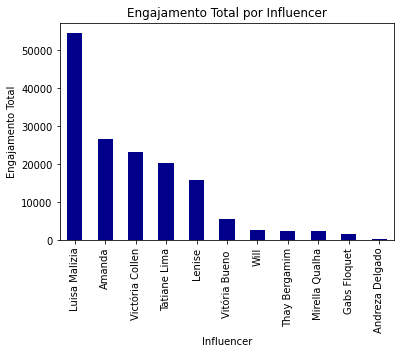

In [11]:
# Gráficos do Engajamento Total 
engajamento_soma.sort_values(ascending= False).plot.bar(title='Engajamento Total por Influencer', color= 'darkblue')
plt.xlabel('Influencer')
plt.ylabel('Engajamento Total');

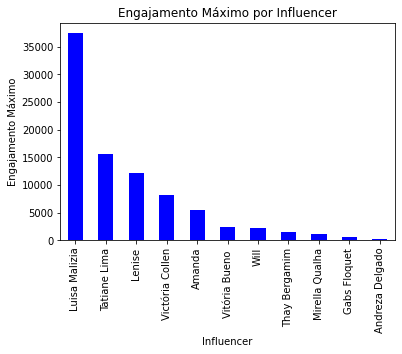

In [12]:
# Gráficos do Engajamento Máximo 
engajamento_max.sort_values(ascending= False).plot.bar(title='Engajamento Máximo por Influencer', color= 'blue')
plt.xlabel('Influencer')
plt.ylabel('Engajamento Máximo');

### Análise do Alcance

O Alcance é uma métrica que quantifica o número de usuários que visualizaram uma determinada publicação feita, no case em questão, a publicação da Colorama no Instagram.

Porém o Alcance é uma métrica única e não será análisada sua soma conforme foi feito para a análise do Engajamento, pois sua soma implicaria em uma duplicação de usuários impactado. Sendo assim, será análisado o Alcance máximo de cada influencer.  


In [13]:
# Cálculo do Alcance Máximo
alcance = influencers['Alcance'].max()
alcance.sort_values(ascending= False)

Nome
Tatiane Lima       379277.0
Amanda             349078.0
Luisa Malizia      171237.0
Victória Collen    141330.0
Lenise             110810.0
Thay Bergamim       25892.0
Will                24478.0
Vitória Bueno       20530.0
Mirella Qualha       9755.0
Gabs Floquet         7407.0
Andreza Delgado      2556.0
Name: Alcance, dtype: float64

* Resultado: 

Os influencers que obtiveram um maior alcance em suas postagens foram Tatiane Lima, Amanda e Luisa Malizia      respectivamente. 

Tatiane Lima e Luisa Malizia assim como no engajamento máximo se destacaram porém no alcance a **Tatiane Lima** surpreendemente se destacou mais que as demais.  

O gráfico abaixo mostra a análise realizada:

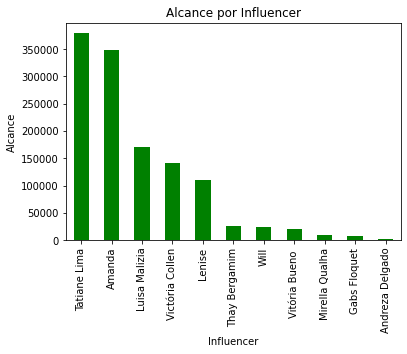

In [14]:
# Gráficos do Alcance 
alcance.sort_values(ascending= False).plot.bar(title='Alcance por Influencer', color= 'green')
plt.xlabel('Influencer')
plt.ylabel('Alcance');

### Análise dos Influencers com base nos seguidores

Outra métrica muito importante a ser considerada é o número de seguidores que cada influencer possui, uma vez que, quanto maior o número de seguidores maior é o seu público, porém não necessariamente gera o mesmo engajamento. 

In [15]:
# Cálculo com base nos seguidores de cada influencer
base_seguidores = influencers['Base/ Seguidores'].max()
base_seguidores.sort_values(ascending= False)

Nome
Victória Collen    979438
Lenise             909816
Amanda             569293
Vitória Bueno      416700
Luisa Malizia      294335
Thay Bergamim      216406
Mirella Qualha     175857
Will               139966
Tatiane Lima       101595
Gabs Floquet        69258
Andreza Delgado     29156
Name: Base/ Seguidores, dtype: int64

* Resultado: 

Com base nos seguidores, os influencers com maior número foram Victória Collen, Lenise e Amanda respectivamente. 

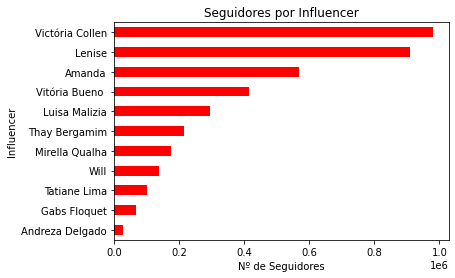

In [16]:
# Gráficos com base nos seguidores de cada influencer
base_seguidores.sort_values(ascending= True).plot.barh(title='Seguidores por Influencer', color= 'red')
plt.xlabel('Nº de Seguidores')
plt.ylabel('Influencer');

## Conclusão do Case

Por meio das análises feitas para o case da campanha Mickey e amigos da Colorama foi possível fazer um comparativo entre os onze influencers contratados para campanha. 

A primeira conclusão foi que as influencers Gabs Floquet e Andreza Delgado apresentaram em todas as análises o menor Engajamento e Alcance, e também menos seguidores. Isso já era de se esperar, e podemos afirmar após as análises que devido ao seu target ser menor por conta dos seguidores acarretou um menor engajamento e alcance. 

Para o engajamento total quem mais se destacou foi Luisa Malizia, Amanda e Victória Collen respectivamente. E para o engajamento máximo Luisa Malizia, seguida por Tatiane Lima e Lenise. 

Os influencers que obtiveram um maior alcance em suas postagens foram Tatiane Lima, Amanda e Luisa Malizia nesta ordem. 

E os influencers com maior número com base nos seguidores foram Victória Collen, Lenise e Amanda.

Logo, podemos dizer que a influencer Luisa Malizia teve um grande destaque pois apesar de não estar entre as três influencers com maior número de seguidores ela teve o maior engajamento e ficou entre os melhores no alcance. Victória Collen apresentou a entrega esperada, por possuir o maior número de seguidores e maior target, ela se destacou em termos de engajamento mas por ser a influencer com mais seguidores os valores de alcance poderiam ter sido melhores, ter atingido um público maior nas suas publicações. O mesmo ocorreu com Lenise, uma das que possuía maior número de seguidoes atingiu um engajamento esperado contudo não obteve mesmo desempenho no alcance. Já a influencer Tatiane Lima deve ser destacada pois apesar de ter um dos números mais baixos de seguidores ela atingiu um alto e incrível alcance. 

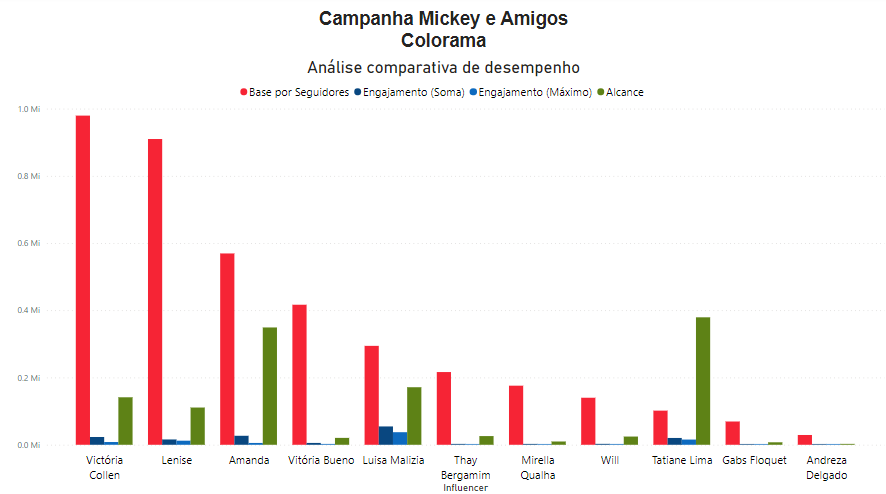

<p align="center">
    <img src="https://www.coloramaesmaltes.com.br/-/media/Project/Loreal/Brand-Sites/Essie/shared/logo_colorama.png?h=300&w=586&la=en&hash=CC66121879A711B262AA66BBAEB61B44906AACF0" width="130">
</p>
